# Topic Modelling


In [1]:
from __future__ import print_function
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import mglearn as mglearn
import pandas as pd
import pyLDAvis
import pyLDAvis.lda_model
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pyLDAvis.enable_notebook()
new_df = pd.read_csv('Topic_Modelling.csv')
new_df.dropna(subset=['Review'], inplace=True)

# Ignore the comments they belong to the the old data


## One Star Reviews


In [2]:
one_text_data=new_df[new_df['overall'] == 1]['Review']
one_text_data

5                                           not very sharp
10               only received fabric suppose receive more
20                     fell apart soon tried thread needle
40       horrible yarn inconsistent skein skein will re...
49       very poor quality very yellowed not all like n...
                               ...                        
29593    hard turn not fit needles taken apart juse cou...
29596    waste threw away so dull afraid cause runs she...
29671    daughter purchased christmas gift maybe twice ...
29696    recieved black row way too much trouble return...
29701    beads received nothing like picture more light...
Name: Review, Length: 796, dtype: object

### 10 Topics


In [3]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(one_text_data)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)
pos_comment_topics = lda.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print(feature_names[sorting])

[['like' 'ca' 'broken' ... 'walmart' 'residue' 'brushes']
 ['quality' 'poor' 'waste' ... 'release' 'effort' 'walmart']
 ['small' 'junk' 'good' ... 'heart' 'effort' 'walmart']
 ...
 ['broke' 'bad' 'easily' ... 'problems' 'sucks' 'crocheting']
 ['disappointed' 'terrible' 'love' ... 'heart' 'walmart' 'sucks']
 ['really' 'wrong' 'soft' ... 'effort' 'walmart' 'sucks']]


In [4]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
like          quality       small         project       work          
ca            poor          junk          expected      fabric        
broken        waste         good          waste         buy           
cheap         different     metal         garbage       came          
unusable      sewing        thread        quality       way           
skein         just          expensive     described     know          
best          broke         smaller       sucks         disappointed  
arrived       try           just          stuff         tried         
plastic       work          like          wax           good          
think         picture       worth         work          blades        


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
need

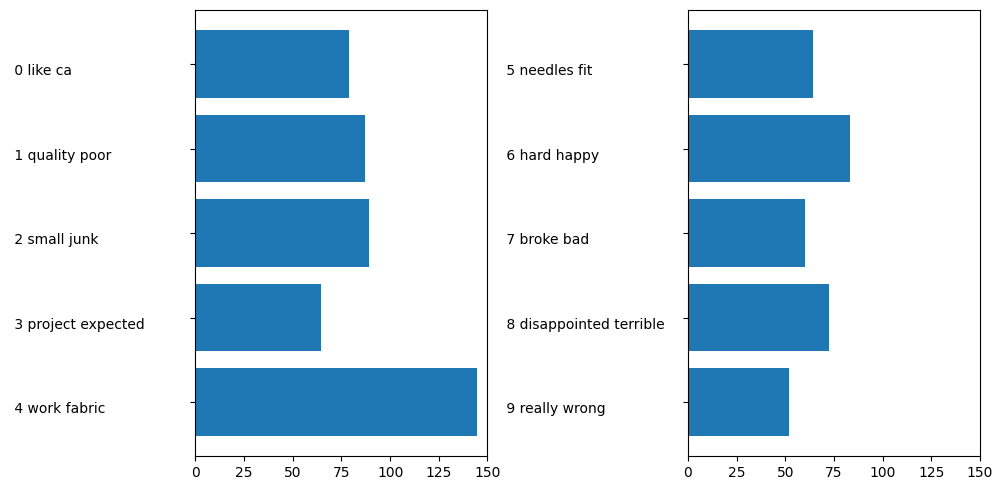

In [5]:
# Summing the document_topics over all reviews. 
# Each topic is named by the two most common words. 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# Two column bar chart:
for col in [0, 1]:
    start = col * 5
    end = (col + 1) * 5
    ax[col].barh(np.arange(5), np.sum(pos_comment_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(5))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 150)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

In [6]:
pyLDAvis.lda_model.prepare(lda,X,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.168431 -0.017852       1        1  20.854705
2      0.032863 -0.107202       2        1  11.476150
1      0.049434  0.078546       3        1  10.991619
6     -0.005586  0.108165       4        1  10.751218
8      0.080887  0.066858       5        1   9.640152
0     -0.058720 -0.030978       6        1   9.615737
3     -0.056265  0.033885       7        1   7.352829
5      0.059188 -0.083303       8        1   6.947186
7      0.016736  0.022665       9        1   6.320500
9      0.049894 -0.070783      10        1   6.049905, topic_info=         Term       Freq      Total Category  logprob  loglift
322   needles   7.000000   7.000000  Default  30.0000  30.0000
56      broke  11.000000  11.000000  Default  29.0000  29.0000
183       fit   9.000000   9.000000  Default  28.0000  28.0000
479     small  12.000000  12.000000  Default  27.0000  27.0000
42        big   8.000000   8.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
238  horrible   1.094490   5.644472  Topic10  -4.7995   1.1647
583   working   0.902072   3.838087  Topic10  -4.9929   1.3571
65        buy   1.196746  15.362322  Topic10  -4.7102   0.2528
426    return   1.082454  10.438000  Topic10  -4.8106   0.5389
349     paper   0.940042  11.560877  Topic10  -4.9516   0.2957

[473 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         6  0.759730     12
3         5  0.535529     20
5         7  0.329116     40
5        10  0.329116     40
6         5  0.515976     50
...     ...       ...    ...
590       6  0.788638  yards
591       1  0.310740   yarn
591       6  0.103580   yarn
591       8  0.310740   yarn
591      10  0.207160   yarn

[849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 7, 9, 1, 4, 6, 8, 10])

### 20 Topics


In [7]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(one_text_data)

# Learning 20 topics
lda20 = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
pos_comment_topics20 = lda20.fit_transform(X)
print("lda.components_.shape: {}".format(lda20.components_.shape))

sorting = np.argsort(lda20.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer:
feature_names20 = np.array(vectorizer.get_feature_names_out())
print(feature_names20[sorting])

lda.components_.shape: (20, 596)
[['work' 'tip' 'regular' ... 'literally' 'given' 'chance']
 ['just' 'time' 'waste' ... 'yards' 'medium' 'bobbins']
 ['small' 'worth' 'evenly' ... 'paying' 'described' 'chance']
 ...
 ['good' 'waste' 'plastic' ... 'rate' 'ball' 'zero']
 ['quality' 'away' 'cheap' ... 'zero' 'vinyl' 'literally']
 ['arrived' 'definitely' 'better' ... 'given' 'threw' 'vinyl']]


In [8]:
# Print out the 20 topics:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names20,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
work          just          small         described     disappointed  
tip           time          worth         priced        said          
regular       waste         evenly        short         sharp         
shape         good          luck          received      needle        
breaks        got           completely    adhesive      fabric        
like          tried         super         nice          hands         
purchasing    like          instructions  leaves        wire          
board         different     bobbin        wanted        fit           
junk          try           pieces        expect        thread        
small         work          threads       set           sure          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
thre

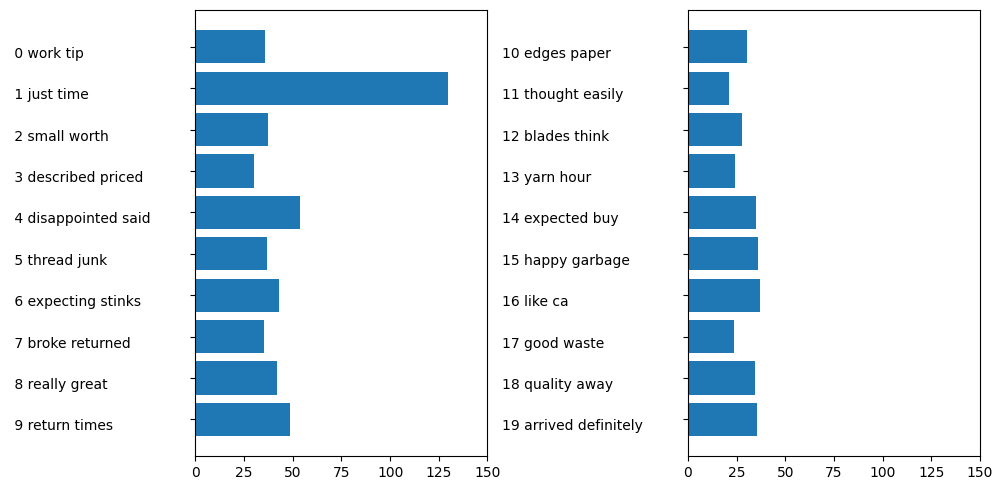

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Topic_names for 20 topics
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names20[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 10
    end = (col + 1) * 10
    ax[col].barh(np.arange(10), np.sum(pos_comment_topics20, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 150)  
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130) 
plt.tight_layout()

In [10]:
pyLDAvis.lda_model.prepare(lda20,X,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.196021  0.034841       1        1  20.911633
4      0.146097  0.046525       2        1   7.672775
9      0.093561 -0.107961       3        1   6.875150
8      0.007769  0.178422       4        1   5.183442
6      0.072194 -0.102976       5        1   4.828324
2      0.011680 -0.055160       6        1   4.534895
14     0.002258 -0.071298       7        1   4.481259
15    -0.005425 -0.006523       8        1   4.392162
0     -0.056217  0.023943       9        1   4.099503
19    -0.045961  0.015399      10        1   4.032472
16    -0.118413 -0.116031      11        1   3.964184
18    -0.027216 -0.039329      12        1   3.952849
5      0.059733  0.061605      13        1   3.951684
7      0.003199  0.039712      14        1   3.760148
10    -0.016755  0.041500      15        1   3.522752
3      0.024251 -0.004190      16        1   3.464777
12     0.009028  0.014676      17        1   2.940610
13     0.026048  0.058905      18        1   2.785252
17    -0.016358  0.003761      19        1   2.377625
11     0.026549 -0.015822      20        1   2.268505, topic_info=         Term       Freq      Total Category  logprob  loglift
56      broke  11.000000  11.000000  Default  30.0000  30.0000
479     small  12.000000  12.000000  Default  29.0000  29.0000
581      work  23.000000  23.000000  Default  28.0000  28.0000
400   quality  13.000000  13.000000  Default  27.0000  27.0000
427  returned   9.000000   9.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
427  returned   0.769231   9.183880  Topic20  -4.1713   1.3062
411    really   0.763582  13.657469  Topic20  -4.1786   0.9020
349     paper   0.592517  11.625136  Topic20  -4.4323   0.8095
25        bad   0.502036   7.527327  Topic20  -4.5980   1.0784
562    wanted   0.423100   5.585250  Topic20  -4.7690   1.2058

[845 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         3  0.291540      10
0         9  0.291540      10
0        20  0.291540      10
1         3  0.376982      12
1         6  0.376982      12
...     ...       ...     ...
592      13  0.210950   years
593       3  0.648493  yellow
594       7  0.449683     yes
594      18  0.449683     yes
595       5  0.500835    zero

[1082 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 10, 9, 7, 3, 15, 16, 1, 20, 17, 19, 6, 8, 11, 4, 13, 14, 18, 12])

## Five Star Reviews


In [11]:
five_text_data=new_df[new_df['overall'] == 5]['Review']
five_text_data

0        love pens sparkle delightfully brilliantly col...
1                                  works well mostly cones
2        great assortment colors though there lot pinks...
3                                                     just
4                            400 birds hospital each month
                               ...                        
29748    nice normally end real sensitive 100 each repa...
29751                                        works perfect
29752                                easy always beautiful
29753                     water paper nice whole hole well
29754    good quality seam ripper seemed ruler favorite...
Name: Review, Length: 22843, dtype: object

### 10 Topics


In [12]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english',binary=True)

X = vectorizer.fit_transform(five_text_data)

lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)
pos_comment_topics = lda.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
print(feature_names[sorting])

[['expected' 'awesome' 'advertised' ... 'aleene' 'aquash' 'zentangle']
 ['good' 'perfect' 'quality' ... 'zentangle' 'pipe' 'bombs']
 ['excellent' 'just' 'wanted' ... 'james' 'stab' 'zentangle']
 ...
 ['nice' 'beautiful' 'beads' ... 'zentangle' 'pipe' 'bombs']
 ['great' 'best' 'love' ... 'aquash' 'pipe' 'bombs']
 ['love' 'yarn' 'loved' ... 'runner' 'adjusting' 'crackle']]


In [13]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)


topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
expected      good          excellent     great         described     
awesome       perfect       just          works         exactly       
advertised    quality       wanted        work          thanks        
sewing        thank         easy          price         arrived       
like          fast          fantastic     value         time          
thread        price         deal          fun           happy         
job           great         great         cute          quickly       
works         shipping      right         buy           stuff         
just          delivery      crafts        yarn          just          
embroidery    service       quilt         love          expected      


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
pret

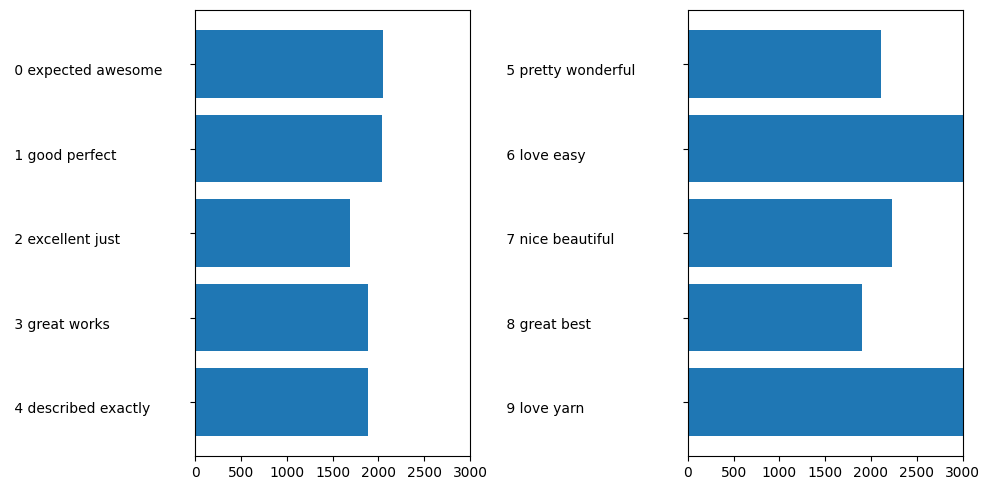

In [14]:
# Summing the document_topics over all reviews. 
# Each topic is named by the two most common words. 

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]

# Two column bar chart:
for col in [0, 1]:
    start = col * 5
    end = (col + 1) * 5
    ax[col].barh(np.arange(5), np.sum(pos_comment_topics, axis=0)[start:end])
    ax[col].set_yticks(np.arange(5))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 3000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()
plt.show()

In [15]:
pyLDAvis.lda_model.prepare(lda,X,vectorizer)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.114278  0.005126       1        1  20.817816
9      0.086505  0.010323       2        1  17.594848
5      0.071228  0.013847       3        1   9.608340
0      0.074188 -0.050318       4        1   8.740027
7      0.046845  0.099453       5        1   8.410620
8      0.075420  0.053305       6        1   8.264880
4     -0.052973 -0.162596       7        1   7.540336
1     -0.258724 -0.126423       8        1   6.705378
2      0.042686 -0.071705       9        1   6.637275
3     -0.199452  0.228990      10        1   5.680478, topic_info=           Term         Freq        Total Category  logprob  loglift
1701      great  1630.000000  1630.000000  Default  30.0000  30.0000
1667       good   850.000000   850.000000  Default  29.0000  29.0000
4342      works   514.000000   514.000000  Default  28.0000  28.0000
2497       nice   656.000000   656.000000  Default  27.0000  27.0000
2717    perfect   540.000000   540.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2689    pattern    11.620734    38.294969  Topic10  -5.6519   1.6756
2282     making    19.978947   193.683608  Topic10  -5.1100   0.5966
2014    jewelry    14.747565    87.483791  Topic10  -5.4136   1.0878
2719  perfectly    12.510158    95.079183  Topic10  -5.5782   0.8400
2179       like    14.922266   332.392171  Topic10  -5.4018  -0.2353

[716 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
31        5  0.800596     3d
35        8  0.861986    400
40        2  0.221906    4mm
40       10  0.665719    4mm
56        9  0.750750     90
...     ...       ...    ...
4384      5  0.023445   year
4384      6  0.093780   year
4384      9  0.046890   year
4388      8  0.837913    yep
4392      2  0.880342  young

[1725 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 6, 1, 8, 9, 5, 2, 3, 4])

### 20 Topics


In [16]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

X = vectorizer.fit_transform(one_text_data)

# Learning 20 topics
lda20 = LatentDirichletAllocation(n_components=20, learning_method="batch",
                                max_iter=25, random_state=0)
pos_comment_topics20 = lda20.fit_transform(X)
print("lda.components_.shape: {}".format(lda20.components_.shape))

sorting = np.argsort(lda20.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names20 = np.array(vectorizer.get_feature_names_out())
print(feature_names20[sorting])

lda.components_.shape: (20, 596)
[['work' 'like' 'tip' ... 'threw' 'mold' 'resin']
 ['time' 'waste' 'just' ... 'impressed' 'opening' 'mat']
 ['thread' 'light' 'products' ... 'resin' 'vinyl' 'threw']
 ...
 ['good' 'love' 'pink' ... 'leaves' 'stinks' 'threw']
 ['quality' 'poor' 'cheap' ... 'vinyl' 'plate' 'priced']
 ['skein' 'yarn' 'yards' ... 'vinyl' 'given' 'threw']]


In [17]:
# Print out the 20 topics:
mglearn.tools.print_topics(topics=range(20), feature_names=feature_names20,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
work          time          thread        returned      needle        
like          waste         light         wrong         said          
tip           just          products      described     disappointed  
breaks        paper         completely    priced        sharp         
board         disappointed  luck          mat           time          
bottle        broke         worth         tiny          wo            
chalk         colors        sucks         short         fabric        
cricut        good          bad           quite         jewelry       
needles       like          good          warped        thread        
known         got           pieces        missing       work          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
real

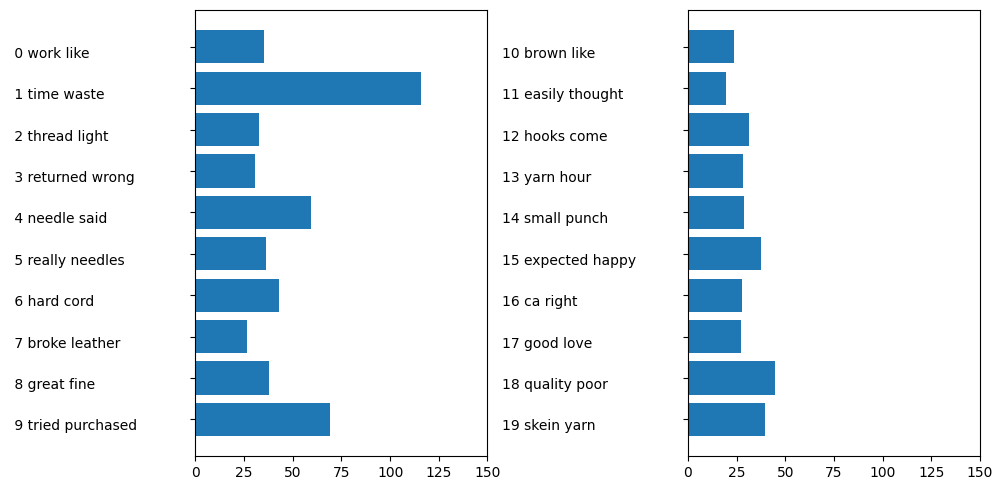

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Topic_names for 20 topics
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names20[sorting[:, :2]])]

# two column bar chart:
for col in [0, 1]:
    start = col * 10
    end = (col + 1) * 10
    ax[col].barh(np.arange(10), np.sum(pos_comment_topics20, axis=0)[start:end])
    ax[col].set_yticks(np.arange(10))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 150)  
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130) 
plt.tight_layout()

In [19]:
pyLDAvis.lda_model.prepare(lda20,X,vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.121010 -0.132909       1        1  17.670094
9     -0.060453  0.111743       2        1  10.308314
4     -0.169828  0.034548       3        1   8.396553
18    -0.021771 -0.137533       4        1   5.613103
19     0.129565  0.004010       5        1   4.981418
6     -0.030153 -0.088709       6        1   4.793701
8      0.018564  0.056629       7        1   4.608075
15    -0.057464 -0.081761       8        1   4.511149
0     -0.005535 -0.058496       9        1   3.996144
5     -0.128576 -0.034451      10        1   3.857806
2     -0.008688  0.051643      11        1   3.729029
3      0.034080  0.079185      12        1   3.531499
12     0.026307  0.042798      13        1   3.485071
13     0.093228  0.106250      14        1   3.449859
14     0.002621  0.004683      15        1   3.445997
17    -0.025196  0.037400      16        1   3.051912
16     0.057159 -0.001682      17        1   2.992904
7      0.015699 -0.004265      18        1   2.932541
10     0.018072 -0.002982      19        1   2.550683
11    -0.008641  0.013897      20        1   2.094147, topic_info=        Term       Freq      Total Category  logprob  loglift
581     work  23.000000  23.000000  Default  30.0000  30.0000
591     yarn  12.000000  12.000000  Default  29.0000  29.0000
400  quality  13.000000  13.000000  Default  28.0000  28.0000
479    small  12.000000  12.000000  Default  27.0000  27.0000
411   really  13.000000  13.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
163   fabric   0.494394  10.866839  Topic20  -4.4899   0.7759
411   really   0.508399  13.014515  Topic20  -4.4620   0.6235
569      way   0.386046  11.774915  Topic20  -4.7373   0.4483
349    paper   0.398595  14.229095  Topic20  -4.7053   0.2909
203    going   0.322620   5.629806  Topic20  -4.9168   1.0067

[849 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         9  0.345419      10
1         2  0.386687      12
1        11  0.386687      12
2         4  0.479803      15
2        16  0.479803      15
...     ...       ...     ...
592       3  0.227626   years
593       2  0.290188  yellow
593       3  0.580376  yellow
594       2  0.517956     yes
595       6  0.534172    zero

[1002 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 5, 19, 20, 7, 9, 16, 1, 6, 3, 4, 13, 14, 15, 18, 17, 8, 11, 12])